In [196]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [377]:
loaded_data = json.load(open('/Users/zaini/projects/facebook_data_analysis/code/kohi_data.json'))

In [378]:
df = pd.io.json.json_normalize(data=loaded_data)

In [379]:
df.head()

,comments.data,comments.summary.can_comment,comments.summary.order,comments.summary.total_count,created_time,id,message
0,[],True,ranked,13,2021-01-12T09:20:16+0000,3519462394833077_3519249238187726,تازه\n\nچیک پاینت طالبان در ساحه پل نهرین در م...
1,[],True,ranked,31,2021-01-12T07:36:19+0000,3519462394833077_3519077488204901,این مرد به هزار سال زندان محکوم شد\n \nمحکمهِ...
2,[],True,ranked,17,2021-01-12T06:52:14+0000,3519462394833077_3519008661545117,دولت آباد\n\nمنابع محلی می گویند که، در جنگ شا...
3,[],True,ranked,8,2021-01-12T06:32:18+0000,3519462394833077_3518978718214778,جنگ‌شدید در شیرین تگاب\n\nطالبان بالای نیروهای...
4,[],True,ranked,23,2021-01-12T05:23:22+0000,3519462394833077_3518870958225554,صدای انفجار مهیبی که شنیده شد انفجار تانک پر ا...


In [380]:
df.drop(df.columns[[0,1,2]], 1, inplace=True)

In [381]:
df.rename(columns={"comments.summary.total_count" : "total_comments"}, inplace=True)

In [382]:
df = df.replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r'\n',  ' ', regex=True)

In [205]:
import datetime
df['month_year'] = pd.to_datetime(df['created_time']).dt.to_period('M')

In [383]:
df.head()

,total_comments,created_time,id,message
0,13,2021-01-12T09:20:16+0000,3519462394833077_3519249238187726,تازه چیک پاینت طالبان در ساحه پل نهرین در مسی...
1,31,2021-01-12T07:36:19+0000,3519462394833077_3519077488204901,این مرد به هزار سال زندان محکوم شد محکمهِ د...
2,17,2021-01-12T06:52:14+0000,3519462394833077_3519008661545117,دولت آباد منابع محلی می گویند که، در جنگ شام ...
3,8,2021-01-12T06:32:18+0000,3519462394833077_3518978718214778,جنگ‌شدید در شیرین تگاب طالبان بالای نیروهای ا...
4,23,2021-01-12T05:23:22+0000,3519462394833077_3518870958225554,صدای انفجار مهیبی که شنیده شد انفجار تانک پر ا...


In [384]:
df['splited_message'] = df['message'].str.split(" ")

In [387]:
df.head()

,total_comments,created_time,id,message,splited_message
0,13,2021-01-12T09:20:16+0000,3519462394833077_3519249238187726,تازه چیک پاینت طالبان در ساحه پل نهرین در مسی...,"[تازه, , چیک, پاینت, طالبان, در, ساحه, پل, نهر..."
1,31,2021-01-12T07:36:19+0000,3519462394833077_3519077488204901,این مرد به هزار سال زندان محکوم شد محکمهِ د...,"[این, مرد, به, هزار, سال, زندان, محکوم, شد, , ..."
2,17,2021-01-12T06:52:14+0000,3519462394833077_3519008661545117,دولت آباد منابع محلی می گویند که، در جنگ شام ...,"[دولت, آباد, , منابع, محلی, می, گویند, که،, در..."
3,8,2021-01-12T06:32:18+0000,3519462394833077_3518978718214778,جنگ‌شدید در شیرین تگاب طالبان بالای نیروهای ا...,"[جنگ‌شدید, در, شیرین, تگاب, , طالبان, بالای, ن..."
4,23,2021-01-12T05:23:22+0000,3519462394833077_3518870958225554,صدای انفجار مهیبی که شنیده شد انفجار تانک پر ا...,"[صدای, انفجار, مهیبی, که, شنیده, شد, انفجار, ت..."


In [389]:
df = df.loc[df['message'].notnull(), ['month_year', 'message', 'splited_message']]

In [390]:
from collections import Counter
words = Counter(" ".join(df['message'].values.tolist()).split(" ")).items()
ls_words = list(words)
df_words = pd.DataFrame(list(words), columns = ['word', 'freq'])

In [391]:
df_words = df_words[df_words['word'].str.len() > 2]

In [392]:
df_words.head()

,word,freq
0,تازه,308
2,چیک,4
3,پاینت,42
4,طالبان,5876
6,ساحه,800


In [111]:
df_negative_words = pd.read_csv('/Users/zaini/projects/facebook_data_analysis/code/negative.txt')

In [117]:
df_positive_words = pd.read_csv('/Users/zaini/projects/facebook_data_analysis/code/positive.txt')

In [114]:
df_negative_words.columns = ['word']

In [246]:
df_positive_words.columns = ['word']

In [393]:
df_neg_words = df_words[df_words['word'].isin(df_negative_words.word)]
df_neg_words = df_neg_words.groupby(['word'], as_index=False).agg({'freq':'sum'})

In [407]:
df_neg_words.sort_values(by=['freq']).tail(10)

,word,freq
195,سرطان,544
200,سقوط,729
45,انفجار,839
186,زخمی,1056
248,قتل,1124
127,حمله,1154
185,زخم,1168
118,جنگ,1415
147,خواجه,1523
409,کشته,3485


In [395]:
df_neg_words = df_neg_words[df_neg_words['freq'] > 1]

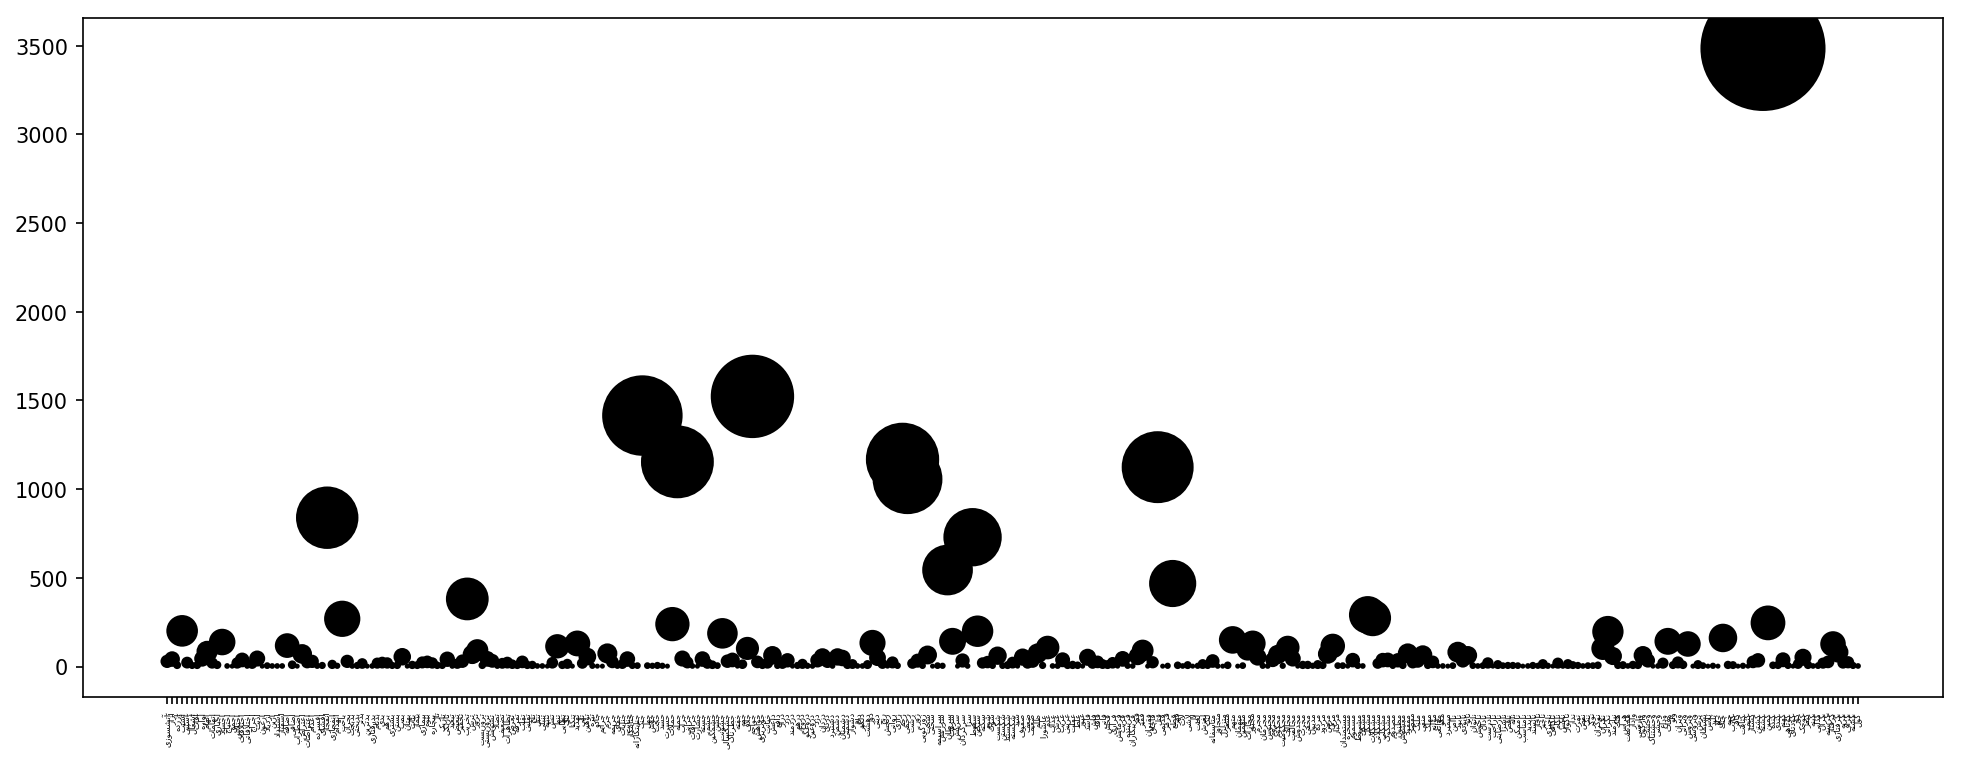

In [401]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape
x = [get_display(reshape(w)) for w in df_neg_words['word']]
y = df_neg_words['freq']
s = df_neg_words['freq']
#plt.xticks(rotation=90)
plt.figure(figsize=(16, 6), dpi=150)
plt.scatter(x, y, s=s, c='k')
plt.xticks(x, x, rotation='vertical', fontsize='4')
plt.show()
#bx = df_neg_words_2016[df_neg_words_2016['freq'] > 1].plot.bar(x='word', rot=90, figsize=(18,4), fontsize=6, color='red')

In [397]:
df_pos_words = df_words[df_words['word'].isin(df_positive_words.word)]
df_pos_words = df_pos_words.groupby(['word'], as_index=False).agg({'freq':'sum'})

In [398]:
df_pos_words = df_pos_words[df_pos_words['freq'] > 1]

In [409]:
df_pos_words.sort_values(by=['freq']).tail(20)

,word,freq
349,موفق,141
250,فراهم,146
133,خوب,147
378,وحدت,149
310,مساعد,151
222,صالح,182
268,لازم,206
111,جدید,226
107,جامع,239
69,بستر,242


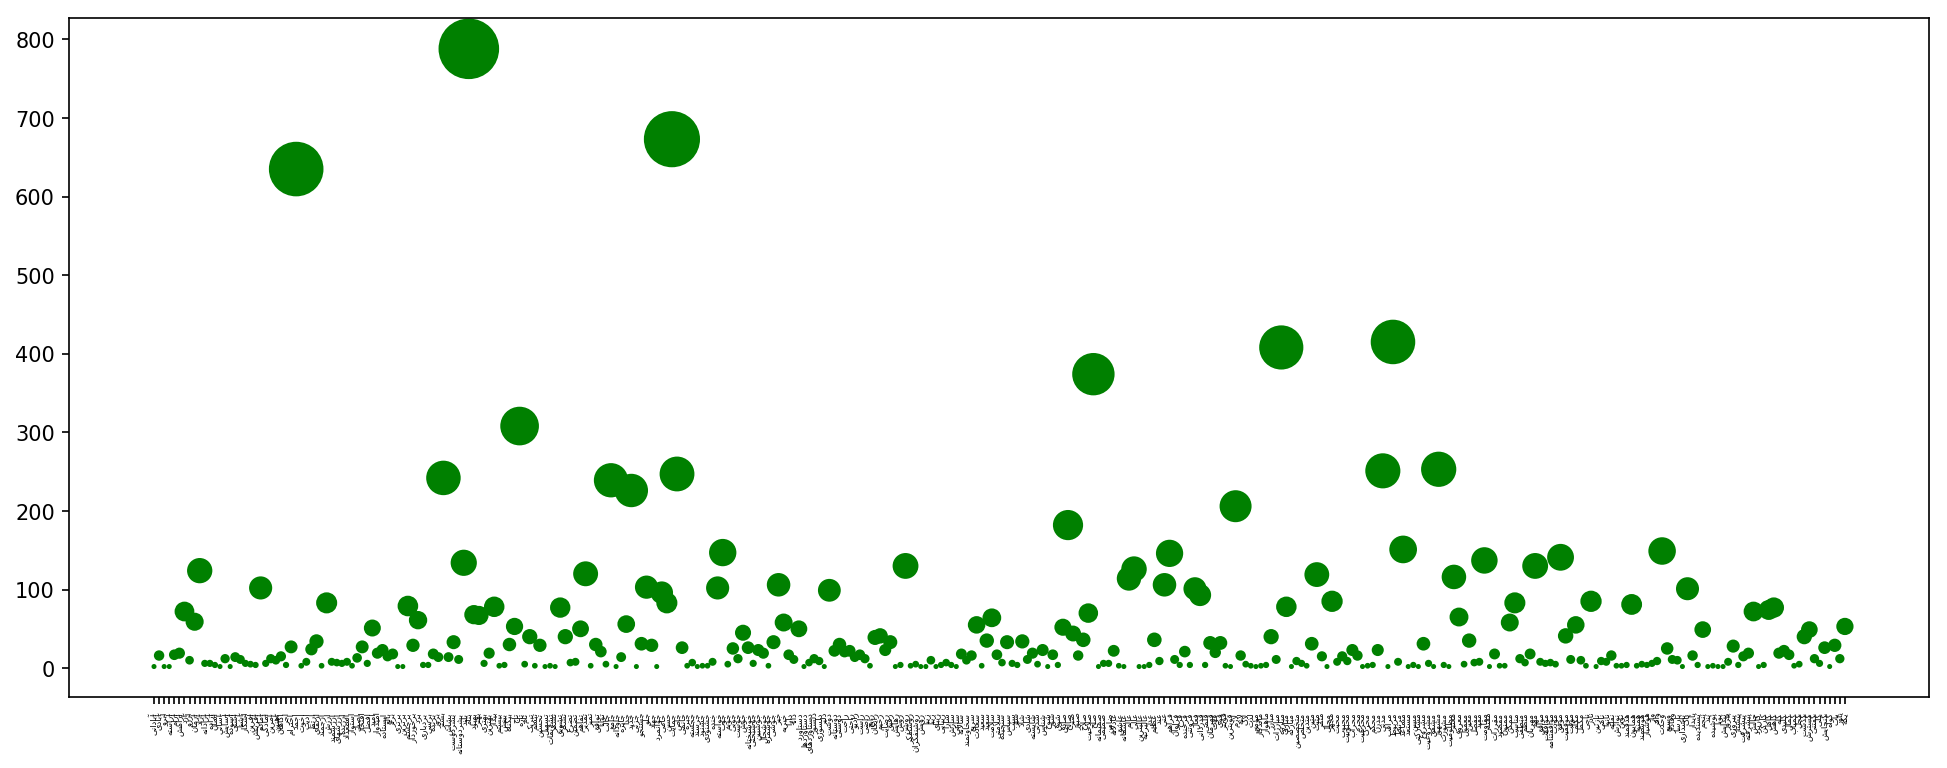

In [408]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape
x = [get_display(reshape(w)) for w in df_pos_words['word']]
y = df_pos_words['freq']
s = df_pos_words['freq']
#plt.xticks(rotation=90)
plt.figure(figsize=(16, 6), dpi=150)
plt.scatter(x, y, s=s, c='green')
plt.xticks(x, x, rotation='vertical', fontsize='4')
plt.show()